In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [2]:
# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from StringIO import StringIO

In [41]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source) 

In [42]:
polls_df = pd.read_csv(poll_data)

In [7]:
polls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 14 columns):
Pollster                  589 non-null object
Start Date                589 non-null object
End Date                  589 non-null object
Entry Date/Time (ET)      589 non-null object
Number of Observations    567 non-null float64
Population                589 non-null object
Mode                      589 non-null object
Obama                     589 non-null int64
Romney                    589 non-null int64
Undecided                 422 non-null float64
Pollster URL              589 non-null object
Source URL                587 non-null object
Partisan                  589 non-null object
Affiliation               589 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 69.0+ KB


In [9]:
polls_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


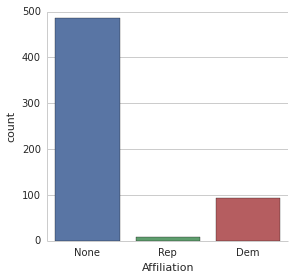

In [12]:
sns.factorplot('Affiliation', data=polls_df, kind='count')

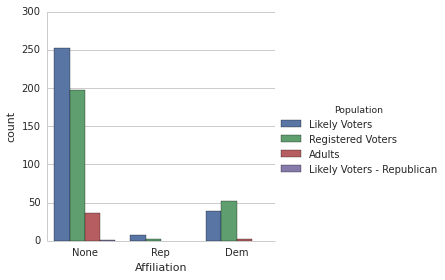

In [14]:
sns.factorplot('Affiliation', data=polls_df, kind='count', hue='Population')

In [18]:
avg = pd.DataFrame(polls_df.mean())
avg.drop('Number of Observations', inplace=True, axis=0)

In [21]:
avg.head()

,0
Obama,46.772496
Romney,44.573854
Undecided,6.549763


In [22]:
std = pd.DataFrame(polls_df.std())
std.drop('Number of Observations', inplace=True, axis=0)

In [24]:
std.head()

,0
Obama,2.448627
Romney,2.927711
Undecided,3.702235


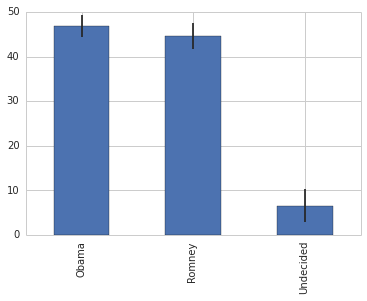

In [25]:
avg.plot(yerr=std, kind='bar', legend=False)

In [27]:
poll_avg = pd.concat([avg, std], axis=1)

In [29]:
poll_avg.columns = ['Average', 'Std']

In [30]:
poll_avg

,Average,Std
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


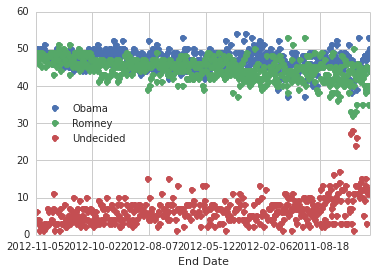

In [32]:
polls_df.plot(x='End Date', y=['Obama', 'Romney', 'Undecided'], linestyle='', marker='o')

In [33]:
from datetime import datetime

In [48]:
polls_df['difference'] = (polls_df.Obama - polls_df.Romney) / 100

In [49]:
polls_df2 = polls_df.groupby(['Start Date'], as_index=False).mean()

In [50]:
polls_df2.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,difference
0,2009-03-13,1403,44,44,12,0.00
1,2009-04-17,686,50,39,11,0.11
2,2009-05-14,1000,53,35,12,0.18
3,2009-06-12,638,48,40,12,0.08
4,2009-07-15,577,49,40,11,0.09


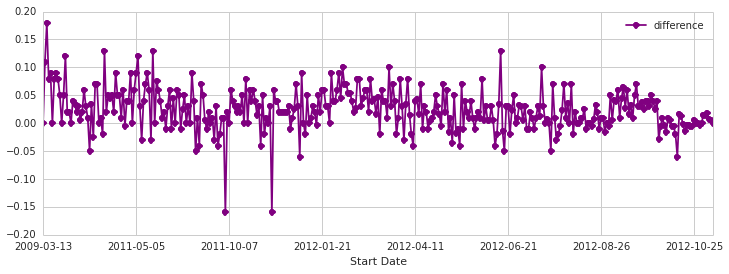

In [51]:
polls_df2.plot('Start Date', 'difference', figsize=(12,4), marker='o', linestyle='-', color='purple')

In [53]:
row_in = 0
xlimit = []
for date in polls_df2['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
    row_in += 1
    
print min(xlimit)
print max(xlimit)

329
356


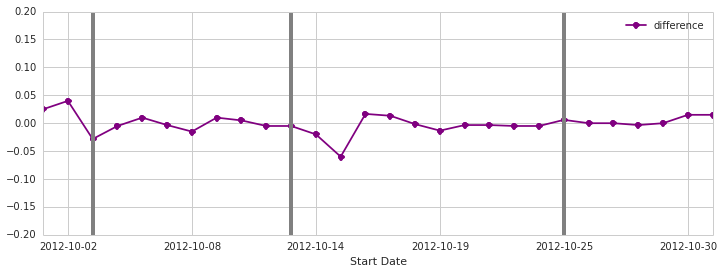

In [57]:
polls_df2.plot('Start Date', 'difference', figsize=(12,4), marker='o', linestyle='-', color='purple', xlim=(329, 356))
plt.axvline(x=329+2, linewidth=4, color='grey')
plt.axvline(x=329+10, linewidth=4, color='grey')
plt.axvline(x=329+21, linewidth=4, color='grey')